In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('anime-dataset-2023.csv')

data = data.loc[data['Genres'] != 'UNKNOWN']



### Quais gêneros são mais e menos encontrados entre os animes?

#### Resposta encontrada:
-  Mais comuns: Comédia, Fantasia e Aventura
-  Menos comuns: Gourmet, Yuri e Erotico

<Axes: xlabel='Genre'>

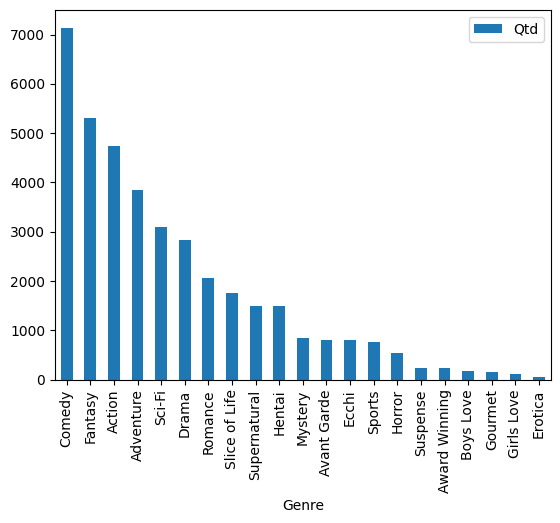

In [4]:
anime_genres = data['Genres'].values
dic = {}  

for genre in anime_genres:

    for each_one in genre.split(','):
        each_one = each_one.strip() 
        if not each_one in dic:
            dic[each_one] = 1
        else:
            dic[each_one] += 1



df = pd.DataFrame(list(dic.items()), columns=['Genre', 'Qtd'])
# display(df)

df = df.sort_values(by='Qtd', ascending=False)
df.plot(kind='bar', x='Genre')
